In [1]:
# Cargar librerias

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Cargar datos

df_orignal = pd.read_csv('202220_Laboratorio_2_data_Empresas_mas_grandes_del_pais_2018.csv', sep=';', encoding = 'utf-8', index_col=0, decimal=',')

# Entendimiento y preparación de los datos

In [3]:
# Observar el número de filas y columnas

df_orignal.shape

(1068, 19)

In [4]:
# Ver una muestra de los datos

df_orignal.head()

,NIT,RAZON SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES\n2018*,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,INGRESOS OPERACIONALES\n2017*,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017,GRUPO EN NIIF
No.,,,,,,,,,,,,,,,,,,,
1,860003563,ABB LTDA,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,"C2711 - Fabricación de motores, generadores y ...",MANUFACTURA,3.571775e+09,-5.872548e+07,2.956848e+09,2.476739e+09,4.801089e+08,4.005049e+09,-8.752900e+07,2.875460e+09,$ 2341172480,5.342871e+08,NIIF PLENAS-GRUPO 1
2,900138670,C.I BIOCOSTA S.A,SUPERSOCIEDADES,Costa Atlántica,MAGDALENA,SANTA-MARTA-MAGDALENA,G4610 - Comercio al por mayor a cambio de una ...,COMERCIO,6.018902e+09,3.504944e+07,1.207011e+09,1.031424e+09,1.755873e+08,4.994552e+09,1.083777e+07,1.020832e+09,$ 894986480,1.258455e+08,NIIF PLENAS-GRUPO 1
3,890302629,CONSTRUCTORA MELENDEZ S.A.,SUPERSOCIEDADES,Costa Pacífica,VALLE,CALI-VALLE,F4111 - Construcción de edificios residenciales,CONSTRUCCIÓN,1.739284e+09,1.735105e+07,3.030767e+09,2.163544e+09,8.672231e+08,1.039942e+09,-3.877247e+07,2.615650e+09,$ 1748991200,8.666590e+08,NIIF PLENAS-GRUPO 1
4,811004055,EMDISALUD,SUPERSALUD,Costa Atlántica,CORDOBA,MONTERIA,O8430- Actividades de planes de seguridad soci...,SERVICIOS,4.033887e+10,-3.016582e+10,9.908133e+09,4.950861e+10,-3.960047e+10,3.696528e+10,-1.086227e+10,9.807867e+09,$ 19246633716,-9.438767e+09,NIIF PYMES-GRUPO 2
5,890503314,CERAMICA ITALIA SA,SUPERSOCIEDADES,Centro - Oriente,NORTE DE SANTANDER,CUCUTA-NORTE DE SANTANDER,C2392 - Fabricación de materiales de arcilla p...,MANUFACTURA,1.419514e+09,4.582130e+06,1.498588e+09,4.971313e+08,1.001457e+09,1.360935e+09,3.250460e+07,1.509246e+09,$ 490200920,1.019045e+09,NIIF PYMES-GRUPO 2


In [5]:
# Revisar las características de los datos: completitud y tipo de dato

df_orignal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 1 to 1068
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NIT                           1068 non-null   int64  
 1   RAZON SOCIAL                  1068 non-null   object 
 2   SUPERVISOR                    1068 non-null   object 
 3   REGIÓN                        1067 non-null   object 
 4   DEPARTAMENTO DOMICILIO        1063 non-null   object 
 5   CIUDAD DOMICILIO              1064 non-null   object 
 6   CIIU                          1067 non-null   object 
 7   MACROSECTOR                   1065 non-null   object 
 8   INGRESOS OPERACIONALES
2018*  1067 non-null   float64
 9   GANANCIA (PERDIDA) 2018       1067 non-null   float64
 10  TOTAL ACTIVOS 2018            1066 non-null   float64
 11  TOTAL PASIVOS 2018            1066 non-null   float64
 12  TOTAL PATRIMONIO 2018         1064 non-null   float64
 13  ING

In [6]:
# Crear Data Frame con los datos preparados

df_prep = df_orignal.copy()

In [7]:
# Revisar consistencia en los datos no númericos

print('Supervisor:')
print(df_prep['SUPERVISOR'].unique())
print('\n')

print('Región:')
print(df_prep['REGIÓN'].unique())
print('\n')

print('Departamento domicilio:')
print(df_prep['DEPARTAMENTO DOMICILIO'].unique())
print('\n')

print('Ciudad domicilio:')
print(df_prep['CIUDAD DOMICILIO'].unique())
print('\n')

print('Clasificación Internacional Industrial Uniforme:')
print(df_prep['CIIU'].unique())
print('\n')

print('Macrosector:')
print(df_prep['MACROSECTOR'].unique())
print('\n')

print('Grupo NIIF:')
print(df_prep['GRUPO EN NIIF'].unique())
print('\n')

Supervisor:
['SUPERSOCIEDADES' 'SUPERSALUD' 'SUPERVIGILANCIA' 'SUPERFINANCIERA'
 'SUPERSERVICIOS' 'SUPERSUCIEDADES']


Región:
['Bogotá - Cundinamarca' 'Costa Atlántica' 'Costa Pacífica'
 'Centro - Oriente' 'Antioquia' 'Costa Atlantica' 'Otros' 'Eje Cafetero'
 nan]


Departamento domicilio:
['BOGOTA D.C.' 'MAGDALENA' 'VALLE' 'CORDOBA' 'NORTE DE SANTANDER'
 'CUNDINAMARCA' 'ANTIOQUIA' 'ATLANTICO' 'GUAJIRA' 'CAUCA' 'SANTANDER'
 'BOLIVAR' 'CASANARE' nan 'RISARALDA' 'BOGOTÁ D.C.' 'CALDAS' 'META'
 'BOYACA' 'HUILA' 'NARIÑO' 'CHOCO' 'SAN ANDRES Y PROVIDENCIA' 'TOLIMA'
 'CESAR' 'SUCRE' 'QUINDIO']


Ciudad domicilio:
['BOGOTA-D.C.-BOGOTA D.C.' 'SANTA-MARTA-MAGDALENA' 'CALI-VALLE' 'MONTERIA'
 'CUCUTA-NORTE DE SANTANDER' 'COTA-CUNDINAMARCA' 'TOCANCIPA-CUNDINAMARCA'
 'ENVIGADO-ANTIOQUIA' 'CHIA-CUNDINAMARCA' 'BARRANQUILLA-ATLANTICO'
 'MEDELLIN-ANTIOQUIA' 'YUMBO-VALLE' 'PALMIRA-VALLE' 'RIOHACHA'
 'CALDAS-ANTIOQUIA' 'GUACHENE-CAUCA' 'FLORIDABLANCA-SANTANDER'
 'CARTAGENA-BOLIVAR' 'JAMUNDI-VALLE' 'LA-ES

In [8]:
# Los datos parecen estar bastante completos por lo cual,
# se considera razonable eliminar los datos con valors nulos

df_prep = df_prep.dropna()

In [9]:
# Quitar los datos duplicados

df_prep = df_prep.drop_duplicates()

In [10]:
# Convertir variables que deberian ser númericas
df_prep['TOTAL PASIVOS 2017'] = df_prep['TOTAL PASIVOS 2017'].str.extract('(\d+)', expand=False)
df_prep['TOTAL PASIVOS 2017'] = df_prep['TOTAL PASIVOS 2017'].astype('float64')
df_prep['TOTAL PASIVOS 2017']

No.
1       2.341172e+09
2       8.949865e+08
3       1.748991e+09
4       1.924663e+10
5       4.902009e+08
            ...     
1062    1.220842e+09
1063    4.265948e+08
1064    3.969365e+08
1065    5.435688e+08
1068    1.459223e+09
Name: TOTAL PASIVOS 2017, Length: 981, dtype: float64

In [11]:
# Describit los datos

df_prep.describe()

,NIT,INGRESOS OPERACIONALES\n2018*,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,INGRESOS OPERACIONALES\n2017*,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017
count,9.810000e+02,9.810000e+02,9.810000e+02,9.810000e+02,9.810000e+02,9.810000e+02,9.810000e+02,9.810000e+02,9.810000e+02,9.800000e+02,9.810000e+02
mean,8.596875e+08,1.123594e+10,6.348647e+08,1.156615e+10,6.545489e+09,6.427301e+11,9.539576e+09,1.309078e+08,1.035288e+10,5.633275e+09,4.868708e+09
std,3.789418e+07,4.332449e+10,5.246175e+09,4.790386e+10,2.712258e+10,1.997418e+13,3.569915e+10,5.411649e+09,4.456298e+10,2.594941e+10,2.352017e+10
min,8.000003e+08,1.343546e+09,-6.993593e+10,7.329964e+07,9.900000e+01,-7.303930e+10,0.000000e+00,-7.977997e+10,6.788196e+07,6.309000e+04,-6.786768e+10
25%,8.300122e+08,1.804139e+09,9.917070e+06,1.229191e+09,6.744897e+08,3.188812e+08,1.584781e+09,3.232660e+06,1.121213e+09,6.018880e+08,2.712504e+08
50%,8.600698e+08,2.803217e+09,6.749969e+07,2.562841e+09,1.396864e+09,8.797335e+08,2.508095e+09,5.050229e+07,2.215665e+09,1.196203e+09,7.979372e+08
75%,8.913002e+08,6.319819e+09,2.684951e+08,6.536978e+09,3.632940e+09,2.671959e+09,5.398135e+09,1.956501e+08,5.847705e+09,3.026666e+09,2.302331e+09
max,9.010975e+08,7.014040e+11,1.155640e+11,1.137620e+12,5.654820e+11,6.256140e+14,5.948910e+11,6.620412e+10,1.075490e+12,5.965040e+11,4.789860e+11


In [12]:
# Quitar datos atipicos

q_low = df_prep["INGRESOS OPERACIONALES\n2018*"].quantile(0.01)
q_hi  = df_prep["INGRESOS OPERACIONALES\n2018*"].quantile(0.99)
df_prep = df_prep[(df_prep["INGRESOS OPERACIONALES\n2018*"] < q_hi) & (df_prep["INGRESOS OPERACIONALES\n2018*"] > q_low)]

q_low = df_prep["GANANCIA (PERDIDA) 2018"].quantile(0.01)
q_hi  = df_prep["GANANCIA (PERDIDA) 2018"].quantile(0.99)
df_prep = df_prep[(df_prep["GANANCIA (PERDIDA) 2018"] < q_hi) & (df_prep["GANANCIA (PERDIDA) 2018"] > q_low)]

q_low = df_prep["TOTAL ACTIVOS 2018"].quantile(0.01)
q_hi  = df_prep["TOTAL ACTIVOS 2018"].quantile(0.99)
df_prep = df_prep[(df_prep["TOTAL ACTIVOS 2018"] < q_hi) & (df_prep["TOTAL ACTIVOS 2018"] > q_low)]

q_low = df_prep["TOTAL PASIVOS 2018"].quantile(0.01)
q_hi  = df_prep["TOTAL PASIVOS 2018"].quantile(0.99)
df_prep = df_prep[(df_prep["TOTAL PASIVOS 2018"] < q_hi) & (df_prep["TOTAL PASIVOS 2018"] > q_low)]

q_low = df_prep["TOTAL PATRIMONIO 2018"].quantile(0.01)
q_hi  = df_prep["TOTAL PATRIMONIO 2018"].quantile(0.99)
df_prep = df_prep[(df_prep["TOTAL PATRIMONIO 2018"] < q_hi) & (df_prep["TOTAL PATRIMONIO 2018"] > q_low)]

q_low = df_prep["INGRESOS OPERACIONALES\n2017*"].quantile(0.01)
q_hi  = df_prep["INGRESOS OPERACIONALES\n2017*"].quantile(0.99)
df_prep = df_prep[(df_prep["INGRESOS OPERACIONALES\n2017*"] < q_hi) & (df_prep["INGRESOS OPERACIONALES\n2017*"] > q_low)]

q_low = df_prep["GANANCIA (PERDIDA) 2017"].quantile(0.01)
q_hi  = df_prep["GANANCIA (PERDIDA) 2017"].quantile(0.99)
df_prep = df_prep[(df_prep["GANANCIA (PERDIDA) 2017"] < q_hi) & (df_prep["GANANCIA (PERDIDA) 2017"] > q_low)]

q_low = df_prep["TOTAL ACTIVOS 2017"].quantile(0.01)
q_hi  = df_prep["TOTAL ACTIVOS 2017"].quantile(0.99)
df_prep = df_prep[(df_prep["TOTAL ACTIVOS 2017"] < q_hi) & (df_prep["TOTAL ACTIVOS 2017"] > q_low)]

q_low = df_prep["TOTAL PASIVOS 2017"].quantile(0.01)
q_hi  = df_prep["TOTAL PASIVOS 2017"].quantile(0.99)
df_prep = df_prep[(df_prep["TOTAL PASIVOS 2017"] < q_hi) & (df_prep["TOTAL PASIVOS 2017"] > q_low)]

q_low = df_prep["TOTAL PATRIMONIO 2017"].quantile(0.01)
q_hi  = df_prep["TOTAL PATRIMONIO 2017"].quantile(0.99)
df_prep = df_prep[(df_prep["TOTAL PATRIMONIO 2017"] < q_hi) & (df_prep["TOTAL PATRIMONIO 2017"] > q_low)]

In [13]:
# Obtener cambios del 2017 al 2018

df_prep['∆ INGRESOS OPERACIONALES 2017-2018'] = df_prep['INGRESOS OPERACIONALES\n2018*'] - df_prep['INGRESOS OPERACIONALES\n2017*']
df_prep['∆ GANANCIA (PERDIDA) 2017-2018'] = df_prep['GANANCIA (PERDIDA) 2018'] - df_prep['GANANCIA (PERDIDA) 2017']
df_prep['∆ ACTIVOS 2017-2018'] = df_prep['TOTAL ACTIVOS 2018'] - df_prep['TOTAL ACTIVOS 2017']
df_prep['∆ TOTAL PASIVOS 2017-2018'] = df_prep['TOTAL PASIVOS 2018'] - df_prep['TOTAL PASIVOS 2017']
df_prep['∆ TOTAL PATRIMONIO 2017-2018'] = df_prep['TOTAL PATRIMONIO 2018'] - df_prep['TOTAL PATRIMONIO 2017']

In [14]:
# Aplicar métodos para normalizar y estandarizar los datos para el modelo

df_prep_2 = df_prep[['∆ INGRESOS OPERACIONALES 2017-2018', '∆ GANANCIA (PERDIDA) 2017-2018', '∆ TOTAL PATRIMONIO 2017-2018']].copy()

mms = MinMaxScaler()


df_prep_norm = mms.fit_transform(df_prep_2.copy())
saved_cols = df_prep_2.columns

df_prep_norm = pd.DataFrame(df_prep_norm, columns =saved_cols)

In [15]:
# Mirar los estadísticos y revisar el resultado de la normalización

df_prep_norm.describe()

,∆ INGRESOS OPERACIONALES 2017-2018,∆ GANANCIA (PERDIDA) 2017-2018,∆ TOTAL PATRIMONIO 2017-2018
count,791.000000,791.000000,791.000000
mean,0.066882,0.318171,0.091049
std,0.056395,0.059110,0.049628
min,0.000000,0.000000,0.000000
25%,0.053786,0.307120,0.079642
50%,0.057795,0.313831,0.082999
75%,0.064873,0.323741,0.089377
max,1.000000,1.000000,1.000000


# Modelamiento

In [16]:
# Encontrar el número óptimo de clústeres utilizando el método del codo

def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

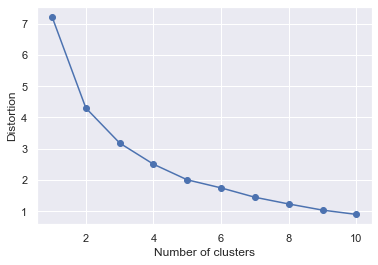

In [17]:
plot_distortion(df_prep_norm,1,11)

In [18]:
# Crear modelo basado en los resultados

N_clusters= 4
kmeans = KMeans(n_clusters=N_clusters, random_state=0) 
kmeans = kmeans.fit(df_prep_norm)

# Validación

## Validación cualitativa

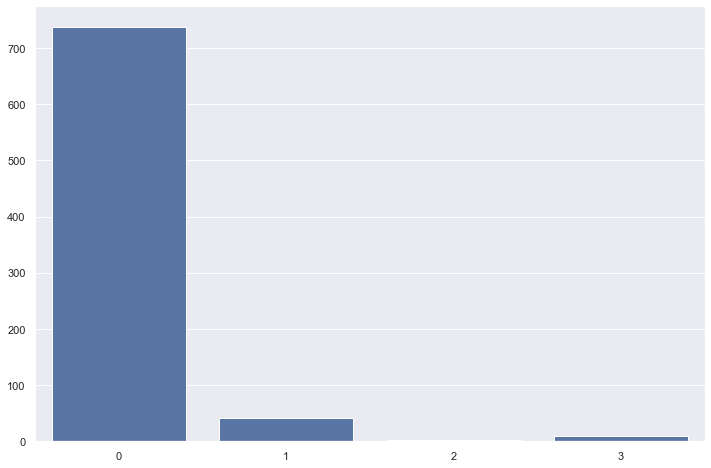

In [19]:
# Revisar la cantidad de registros en los clústeres resultado
labels = kmeans.labels_
df_prep_norm['Cluster'] = labels

cluster_distrib = df_prep_norm['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');

In [20]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_prep_norm.groupby('Cluster').count()

,∆ INGRESOS OPERACIONALES 2017-2018,∆ GANANCIA (PERDIDA) 2017-2018,∆ TOTAL PATRIMONIO 2017-2018
Cluster,,,
0,737,737,737
1,42,42,42
2,3,3,3
3,9,9,9


In [21]:
#Transformar el contenido de las columnas a arreglo
cols_number = df_prep_norm.to_numpy()
cols_number

name_cols_number = ['∆ INGRESOS OPERACIONALES 2017-2018', '∆ GANANCIA (PERDIDA) 2017-2018', '∆ TOTAL PATRIMONIO 2017-2018']

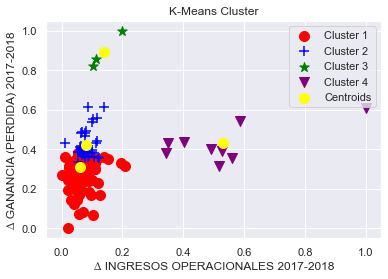

In [22]:
# Dibujar las primeras dos columnas utilizadas en el clustering que están en la posición 0 y 1
plt.scatter(cols_number[kmeans.labels_ == 0, 0], cols_number[kmeans.labels_ == 0, 1], s = 100, marker='o', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans.labels_ == 1, 0], cols_number[kmeans.labels_ == 1, 1], s = 100, marker='+', c = 'blue', label = 'Cluster 2')
plt.scatter(cols_number[kmeans.labels_ == 2, 0], cols_number[kmeans.labels_ == 2, 1], s = 100, marker='*', c = 'green', label = 'Cluster 3')
plt.scatter(cols_number[kmeans.labels_ == 3, 0], cols_number[kmeans.labels_ == 3, 1], s = 100, marker='v', c = 'purple', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('K-Means Cluster')
plt.xlabel(name_cols_number[0])
plt.ylabel(name_cols_number[1])
plt.legend()
plt.show()

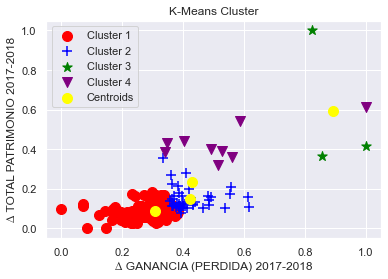

In [23]:
 # Dibujar las primeras dos columnas utilizadas en el clustering que están en la posición 1 y 2
plt.scatter(cols_number[kmeans.labels_ == 0, 1], cols_number[kmeans.labels_ == 0, 2], s = 100, marker='o', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans.labels_ == 1, 1], cols_number[kmeans.labels_ == 1, 2], s = 100, marker='+', c = 'blue', label = 'Cluster 2')
plt.scatter(cols_number[kmeans.labels_ == 2, 1], cols_number[kmeans.labels_ == 2, 2], s = 100, marker='*', c = 'green', label = 'Cluster 3')
plt.scatter(cols_number[kmeans.labels_ == 3, 0], cols_number[kmeans.labels_ == 3, 1], s = 100, marker='v', c = 'purple', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 100, c = 'yellow', label = 'Centroids')
plt.title('K-Means Cluster')
plt.xlabel(name_cols_number[1])
plt.ylabel(name_cols_number[2])
plt.legend()
plt.show()

/var/folders/76/3j27vxbs3m98vw358_6b2rvm0000gn/T/ipykernel_8192/1058507566.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


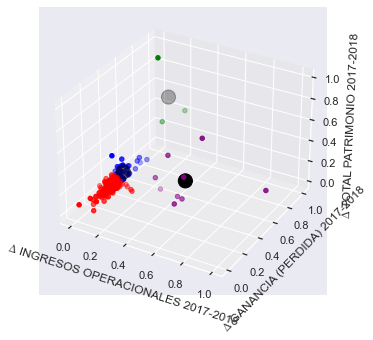

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(cols_number[kmeans.labels_ == 0, 0], cols_number[kmeans.labels_ == 0, 1], cols_number[kmeans.labels_ == 0, 2],color='red')
ax.scatter(cols_number[kmeans.labels_ == 2, 0], cols_number[kmeans.labels_ == 2, 1], cols_number[kmeans.labels_ == 2, 2],color='green')
ax.scatter(cols_number[kmeans.labels_ == 1, 0], cols_number[kmeans.labels_ == 1, 1], cols_number[kmeans.labels_ == 1, 2],color='blue')
ax.scatter(cols_number[kmeans.labels_ == 3, 0], cols_number[kmeans.labels_ == 3, 1], cols_number[kmeans.labels_ == 3, 2],color='purple')

ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], color='black',marker='o',s=200, label='centroids')
ax.set_xlabel(name_cols_number[0])
ax.set_ylabel(name_cols_number[1])
ax.set_zlabel(name_cols_number[2])
plt.show()

Se puede notar que los clusters 1 y 2 no se encuentran muy separados el uno del otro, lo cual no es deseable para esta tarea de aprendizaje. Sin embargo, estos clusters si muestran un alto grado de cohesion dentro de sus datos ya que es notable que en su mayoría los datos que pertenecen a estos clusters se encuntran muy cercanos unos de los otros

Los clusters 3 y 4 por el otro lado tienen un comportamiento completamente opuesto. Estos clusters tienen una separación notable de los demas clusters, lo cual es deseado. Pero por el otro lado, los datos dentro de estos clusters muestran una baja cohesión, lo cuál no es deseado para esta tarea de aprendizaje.

## Validación cuantitativa

In [25]:
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Clústeres',
                   xlabel = "Silhouette coefficient",
                   title = 'Silhouette Plot'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()
    
    return silhouette_avg

[0 1 2 3]


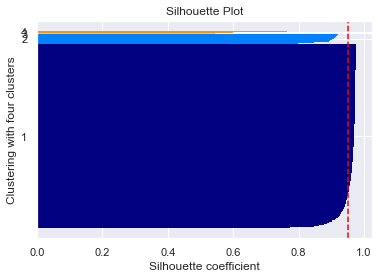

0.952167204689159

In [26]:
plot_silhouette(data = df_prep_norm, 
                labels = kmeans.labels_, 
                ylabel = 'Clustering with four clusters')

Se hace una evaluación cuantitativa usando el metodo de la silueta. Este muestra en general un buen resultado de clustering donde el coeficiente de silueta promedio esta arriba de 0.9. Esto significa que en general hay una alta cohesión entre los datos dentro de cada cluster y un alto distanciamiento entre cada cluster.